In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

2022-10-17 11:43:33.413629: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-10.0/lib64:/usr/local/cuda-10.1/lib64:/usr/lib/nvidia-418/
2022-10-17 11:43:33.413696: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-17 11:43:33.453835: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-17 11:43:34.289760: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-10.0/lib64:/usr/local/cuda-10.1/lib64:/usr/lib/nvidia-418

In [3]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
train_scaled, train_target, test_size=0.2, random_state=42)

In [4]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',padding='same', input_shape=(28,28,1)))

2022-10-17 11:43:47.165070: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-10.0/lib64:/usr/local/cuda-10.1/lib64:/usr/lib/nvidia-418/
2022-10-17 11:43:47.165208: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-10.0/lib64:/usr/local/cuda-10.1/lib64:/usr/lib/nvidia-418/
2022-10-17 11:43:47.165301: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-10.0/lib64:/usr/local/cuda-10.1/lib64:/usr/lib/nvidia-418/
2022-10-17 11:43:47.167302: W tenso

In [5]:
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [7]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [11]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [10]:
!pip install pydot

In [11]:
# Adam optimiser
# ModelCheckpoint callbacks, EarlyStopping callbacks

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data = 
                   (val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 13s 8ms/step - loss: 0.5445 - accuracy: 0.8048 - val_loss: 0.3463 - val_accuracy: 0.8750
Epoch 2/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3668 - accuracy: 0.8683 - val_loss: 0.2975 - val_accuracy: 0.8918
Epoch 3/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3134 - accuracy: 0.8885 - val_loss: 0.2665 - val_accuracy: 0.9021
Epoch 4/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2825 - accuracy: 0.8971 - val_loss: 0.2499 - val_accuracy: 0.9076
Epoch 5/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2572 - accuracy: 0.9067 - val_loss: 0.2385 - val_accuracy: 0.9102
Epoch 6/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2372 - accuracy: 0.9120 - val_loss: 0.2510 - val_accuracy: 0.9047
Epoch 7/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2218 - accuracy: 0.9181 - val_loss: 0.2278 - val_

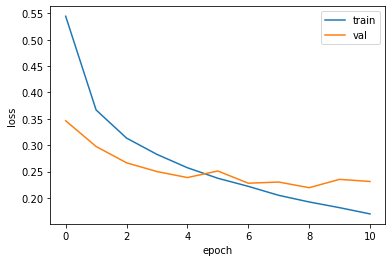

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [13]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2193 - accuracy: 0.9218


[0.2193007469177246, 0.921833336353302]

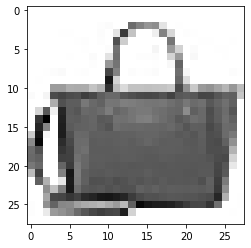

In [14]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [16]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 123ms/step
[[4.0779707e-19 4.0205071e-28 1.8698354e-23 1.8427442e-22 8.8221821e-22
  2.2112439e-17 1.0805057e-18 6.7094667e-21 1.0000000e+00 6.7196607e-21]]


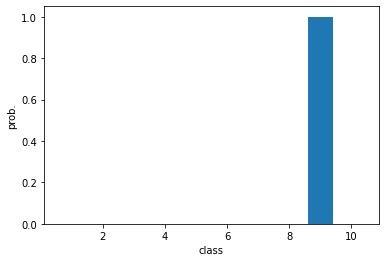

In [17]:
# visualised in a bar chart
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()